# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

### Задание:
1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
<br>2.1. обработку пропусков в данных;
<br>2.2. кодирование категориальных признаков;
<br>2.3. масштабирование данных.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
%matplotlib inline 
sns.set(style="ticks")

In [3]:
data = pd.read_csv('train.csv', sep=",")

##### Размер датасета

In [4]:
data.shape

(891, 12)

##### Типы данных колонок

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##### Проверим были ли пропущены <br/>значения в каких-нибудь колонках

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Первые пять строк датасета

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
total_count = data.shape[0]
print(f'Всего строк: {total_count}')

Всего строк: 891


## 1. Обработка пропущенных данных

### 1.1. Простые стратегии - удаление или заполнение нулями

#### 1.1.1. Удаление колонок содержащих пустые значения

In [8]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((891, 12), (891, 9))

#### 1.1.2. Удаление строк содержащих пустые значения

In [9]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((891, 12), (183, 12))

#### 1.1.2. Заполнение всех пропущенных значений нулями, что некорректно для категориальных знаичений

In [10]:
data_new_3 = data.fillna(0)
data_new_3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


### "Внедрение значений" - импьютация
#### 1.2.1. Обработка пропусков в числовых данных
<br>Выберем числовые колонки с пропущенными значениями

In [11]:
num_cols = [col for col in data.columns if (data[data[col].isnull()].shape[0] > 0 \
                                            and (data[col].dtype=='float64' or data[col].dtype=='int64'))]
for col in num_cols:
    print(f"Колонка {col}, количество пропусков {data[col].isnull().sum()} - \
    {round((data[col].isnull().sum()/total_count)*100,2)}%")

Колонка Age, количество пропусков 177 - 19.87%


##### Фильтр по колонкам с пропущенными значениями

In [12]:
data_num = data[num_cols]
data_num

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


c:\users\linalt\ml\.venv\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\linalt\ml\.venv\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


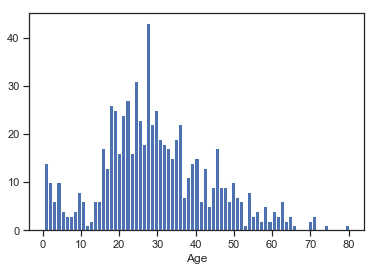

In [13]:
for col in data_num:
    plt.hist(data[col], 75)
    plt.xlabel(col)
    plt.show()

In [14]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [15]:
missedValues = data[data['Age'].isnull()].index
missedValues

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [16]:
data[data.index.isin(missedValues)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [17]:
data_num[data_num.index.isin(missedValues)]['Age']

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
29    NaN
31    NaN
32    NaN
36    NaN
42    NaN
45    NaN
46    NaN
47    NaN
48    NaN
55    NaN
64    NaN
65    NaN
76    NaN
77    NaN
82    NaN
87    NaN
95    NaN
101   NaN
107   NaN
109   NaN
121   NaN
126   NaN
128   NaN
140   NaN
154   NaN
       ..
718   NaN
727   NaN
732   NaN
738   NaN
739   NaN
740   NaN
760   NaN
766   NaN
768   NaN
773   NaN
776   NaN
778   NaN
783   NaN
790   NaN
792   NaN
793   NaN
815   NaN
825   NaN
826   NaN
828   NaN
832   NaN
837   NaN
839   NaN
846   NaN
849   NaN
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [18]:
data_num_age=data_num[['Age']]
data_num_age.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


 
<br>Фильтр для проверки заполнения пустых значений

In [19]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_age)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [20]:
strategies=['mean', 'median','most_frequent']

т.е. нашими стратегиями будут: 
* Среднее значение
* Медиана 
* Наиболее часто встречающаяся величина

<br> Определим функцию для импьютации в которую <br/>будет отправляться название стратегии как аргумент

In [21]:
def test_num_impute(strat):
    # Определяем сратегию 
    imp_num = SimpleImputer(strategy=strat)
    data_num_imp = imp_num.fit_transform(data_num_age)
    return data_num_imp[mask_missing_values_only]

In [22]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911

In [23]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28

In [24]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 

###### 1.2.2. Обработка пропусков в категориальных данных

Выберем категорильные колонки с пропущенными значениями

In [25]:
cat_cols = [col for col in data.columns if (data[data[col].isnull()].shape[0] > 0 \
                                            and data[col].dtype=='object')]
for col in cat_cols:
    print(f"Колонка {col}, количество пропусков {data[col].isnull().sum()} - \
    {round((data[col].isnull().sum()/total_count)*100,2)}%")

Колонка Cabin, количество пропусков 687 - 77.1%
Колонка Embarked, количество пропусков 2 - 0.22%


In [26]:
cat_temp_data = data[['Cabin']]
cat_temp_data.head()

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN


<br> Получим уникальныые значения для колонки

In [28]:
cat_temp_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [29]:
cat_temp_data[cat_temp_data['Cabin'].isnull()].shape

(687, 1)

Импьютация наиболее частыми выражениями

In [30]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['B96 B98'],
       ['C85'],
       ['B96 B98'],
       ['C123'],
       ['B96 B98'],
       ['B96 B98'],
       ['E46'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['G6'],
       ['C103'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['D56'],
       ['B96 B98'],
       ['A6'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['C23 C25 C27'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B78'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       ['B96 B98'],
       [

Проверим, что пустые значения отсутствуют

In [31]:
np.unique(data_imp2)

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

Импьютация константой

In [32]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='MyConst')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['MyConst'],
       ['C85'],
       ['MyConst'],
       ['C123'],
       ['MyConst'],
       ['MyConst'],
       ['E46'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['G6'],
       ['C103'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['D56'],
       ['MyConst'],
       ['A6'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['C23 C25 C27'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['B78'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       ['MyConst'],
       [

In [33]:
np.unique(data_imp3)

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

In [34]:
data_imp3[data_imp3=='MyConst'].size

687

<br> 

### 2. Форматирование категориальных признаков в числовые

Рассмотрим набор, в котором мы заменили пропущенные значения на саме частое значение

In [35]:
cat_enc = pd.DataFrame({'Cabin':data_imp2.T[0]})
cat_enc

,Cabin
0,B96 B98
1,C85
2,B96 B98
3,C123
4,B96 B98
5,B96 B98
6,E46
7,B96 B98
8,B96 B98
9,B96 B98


#### 2.1 Label encoding - кодирование целыми значениями

In [36]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['Cabin'])

In [37]:
cat_enc['Cabin'].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [38]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146])

In [39]:
le.inverse_transform([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146])

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

#### 2.2. One-hot encoding - Кодирование наборами бинарных значений

In [40]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['Cabin']])

In [41]:
cat_enc.shape

(891, 1)

In [42]:
cat_enc_ohe.shape

(891, 147)

In [43]:
cat_enc_ohe

<891x147 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [44]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
cat_enc.head(10)

,Cabin
0,B96 B98
1,C85
2,B96 B98
3,C123
4,B96 B98
5,B96 B98
6,E46
7,B96 B98
8,B96 B98
9,B96 B98


#### Pandas get_dummies  - быстрый вариант one-hot кодирования

In [46]:
pd.get_dummies(cat_enc).head()

,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


dummy_na - параметр, который создает отдельый столбец для NaNов, если False, то игнорирует NaNы

In [47]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

### 3. Масштабированние данных

,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 3. Заполним пропуски и закодируем пропуски в нашей выборке

In [48]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [49]:
imp_num = SimpleImputer(strategy='mean')
data['Age'] = imp_num.fit_transform(data_num_age)

In [50]:
data['Age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [51]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### 4. Масштабирование

#### 4.1. MinMax - масштабирование

In [52]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Age']])

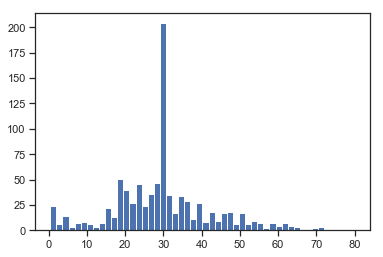

In [53]:
plt.hist(data['Age'], 50)
plt.show()

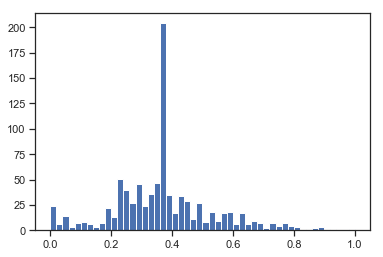

In [54]:
plt.hist(sc1_data, 50)
plt.show()

#### 4.2. Z-оценка - StandartScaling

In [60]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Age']])

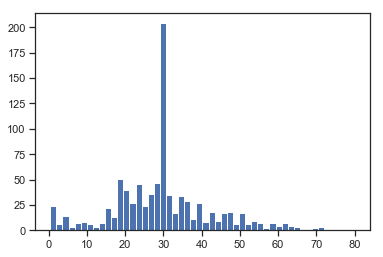

In [61]:
plt.hist(data['Age'],50)
plt.show()

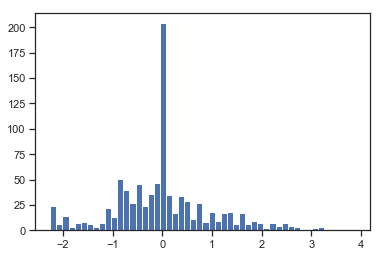

In [62]:
plt.hist(sc2_data,50)
plt.show()

### 5. Нормализация данных

In [63]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Age']])

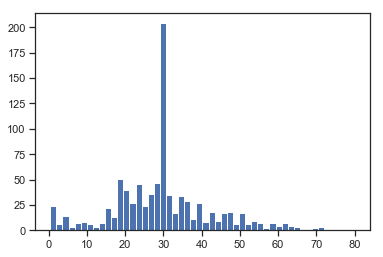

In [65]:
plt.hist(data['Age'],50)
plt.show()

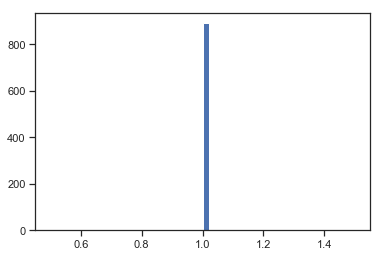

In [68]:
plt.hist(sc3_data,50)
plt.show()